In [17]:
%store -r gdp_pc color_mapping code_to_name

### PIB per cápita
En esta sección se examina el PIB per cápita a largo plazo de varios países.
#### Reino Unido
En primer lugar, examinamos el crecimiento del PIB del Reino Unido

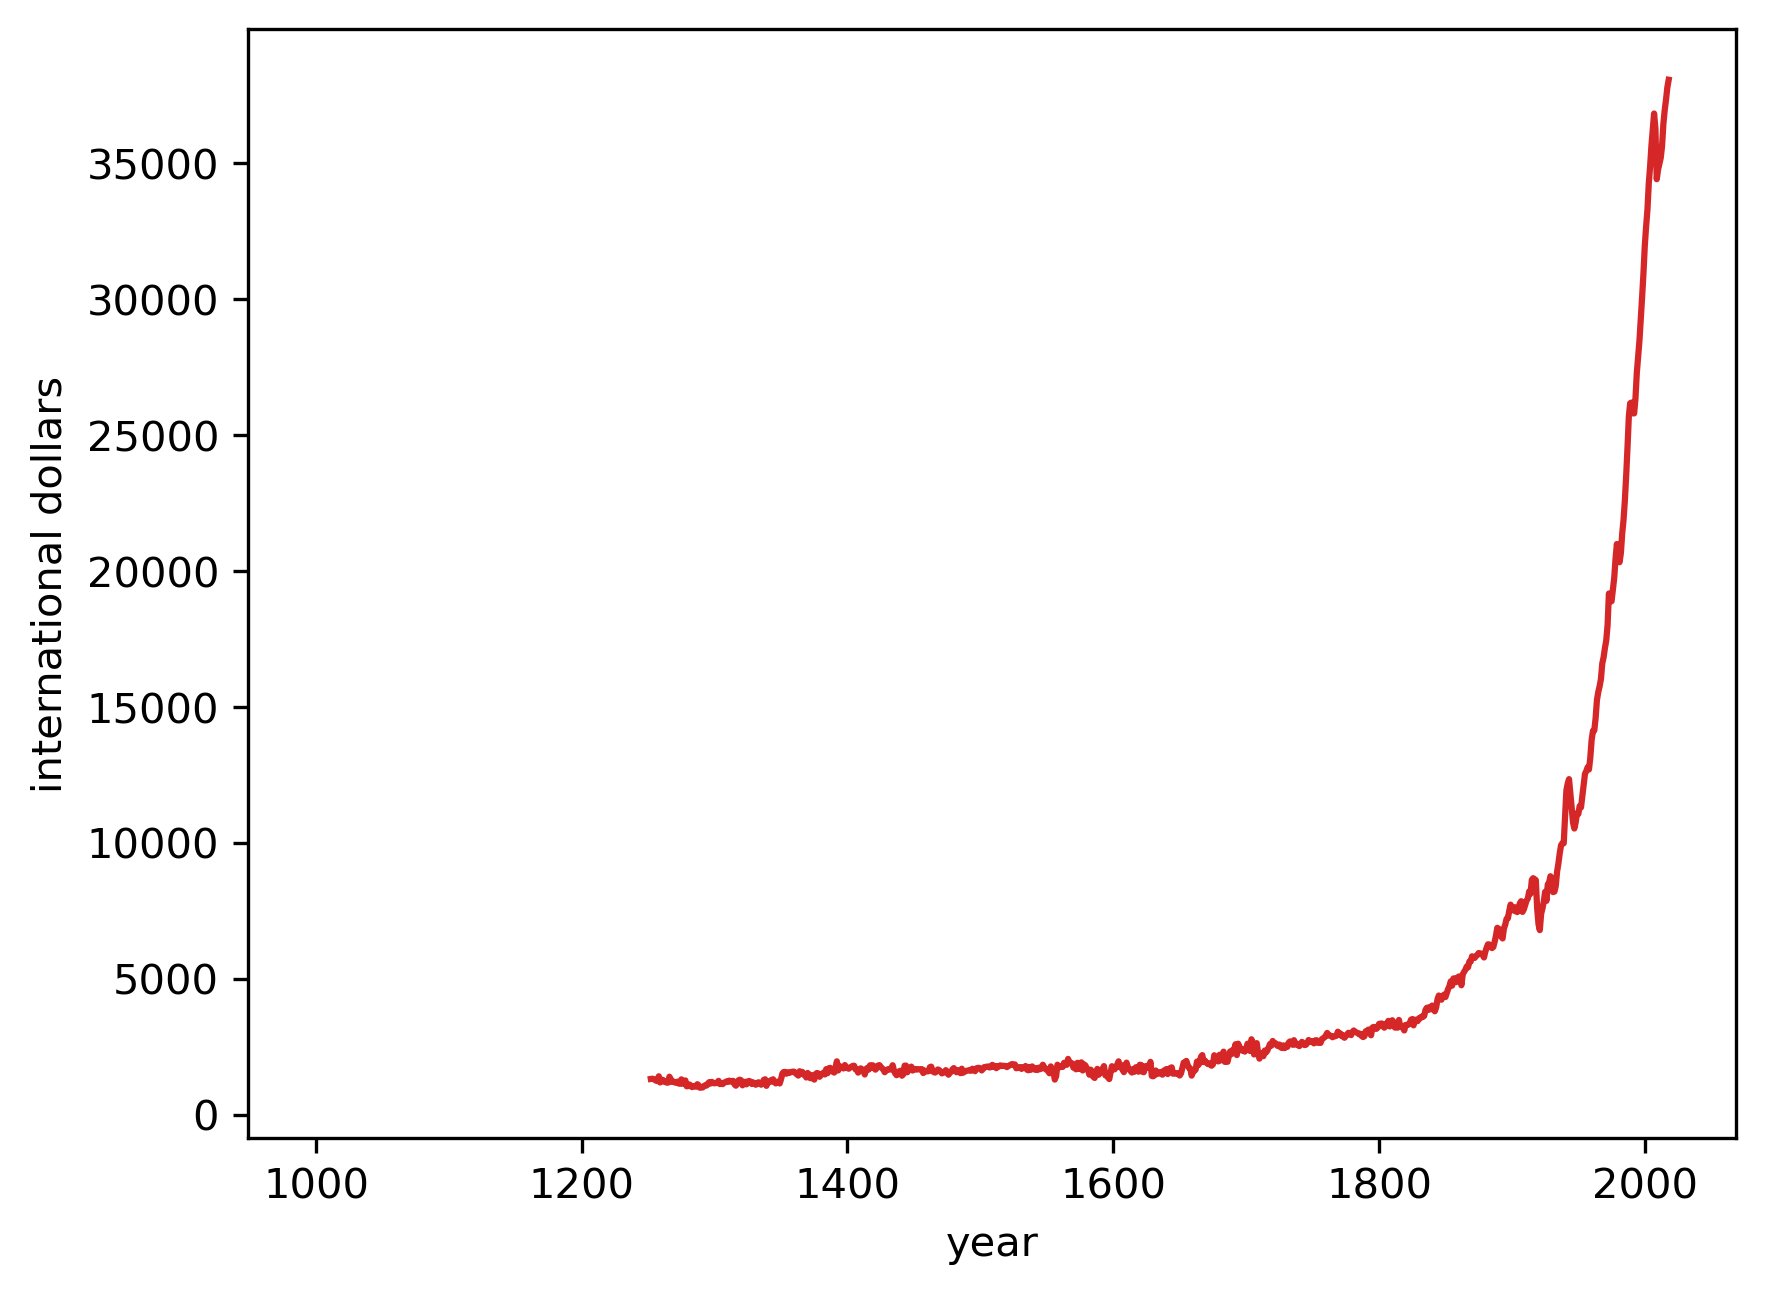

In [18]:
fig, ax = plt.subplots(dpi=300)
country = 'GBR'
gdp_pc[country].plot(
        ax=ax,
        ylabel='international dollars',
        xlabel='year',
        color=color_mapping[country]
    );

Nota

Los dólares internacionales son una unidad monetaria hipotética que tiene la misma paridad de poder adquisitivo que el dólar estadounidense en Estados Unidos en un momento dado. También se conocen como dólares Geary-Khamis (dólares GK).

Podemos ver que los datos no son continuos en los periodos más largos de los primeros 250 años de este milenio, por lo que podríamos optar por interpolar para obtener un gráfico de líneas continuas.

Aquí utilizamos líneas discontinuas para indicar las tendencias interpoladas

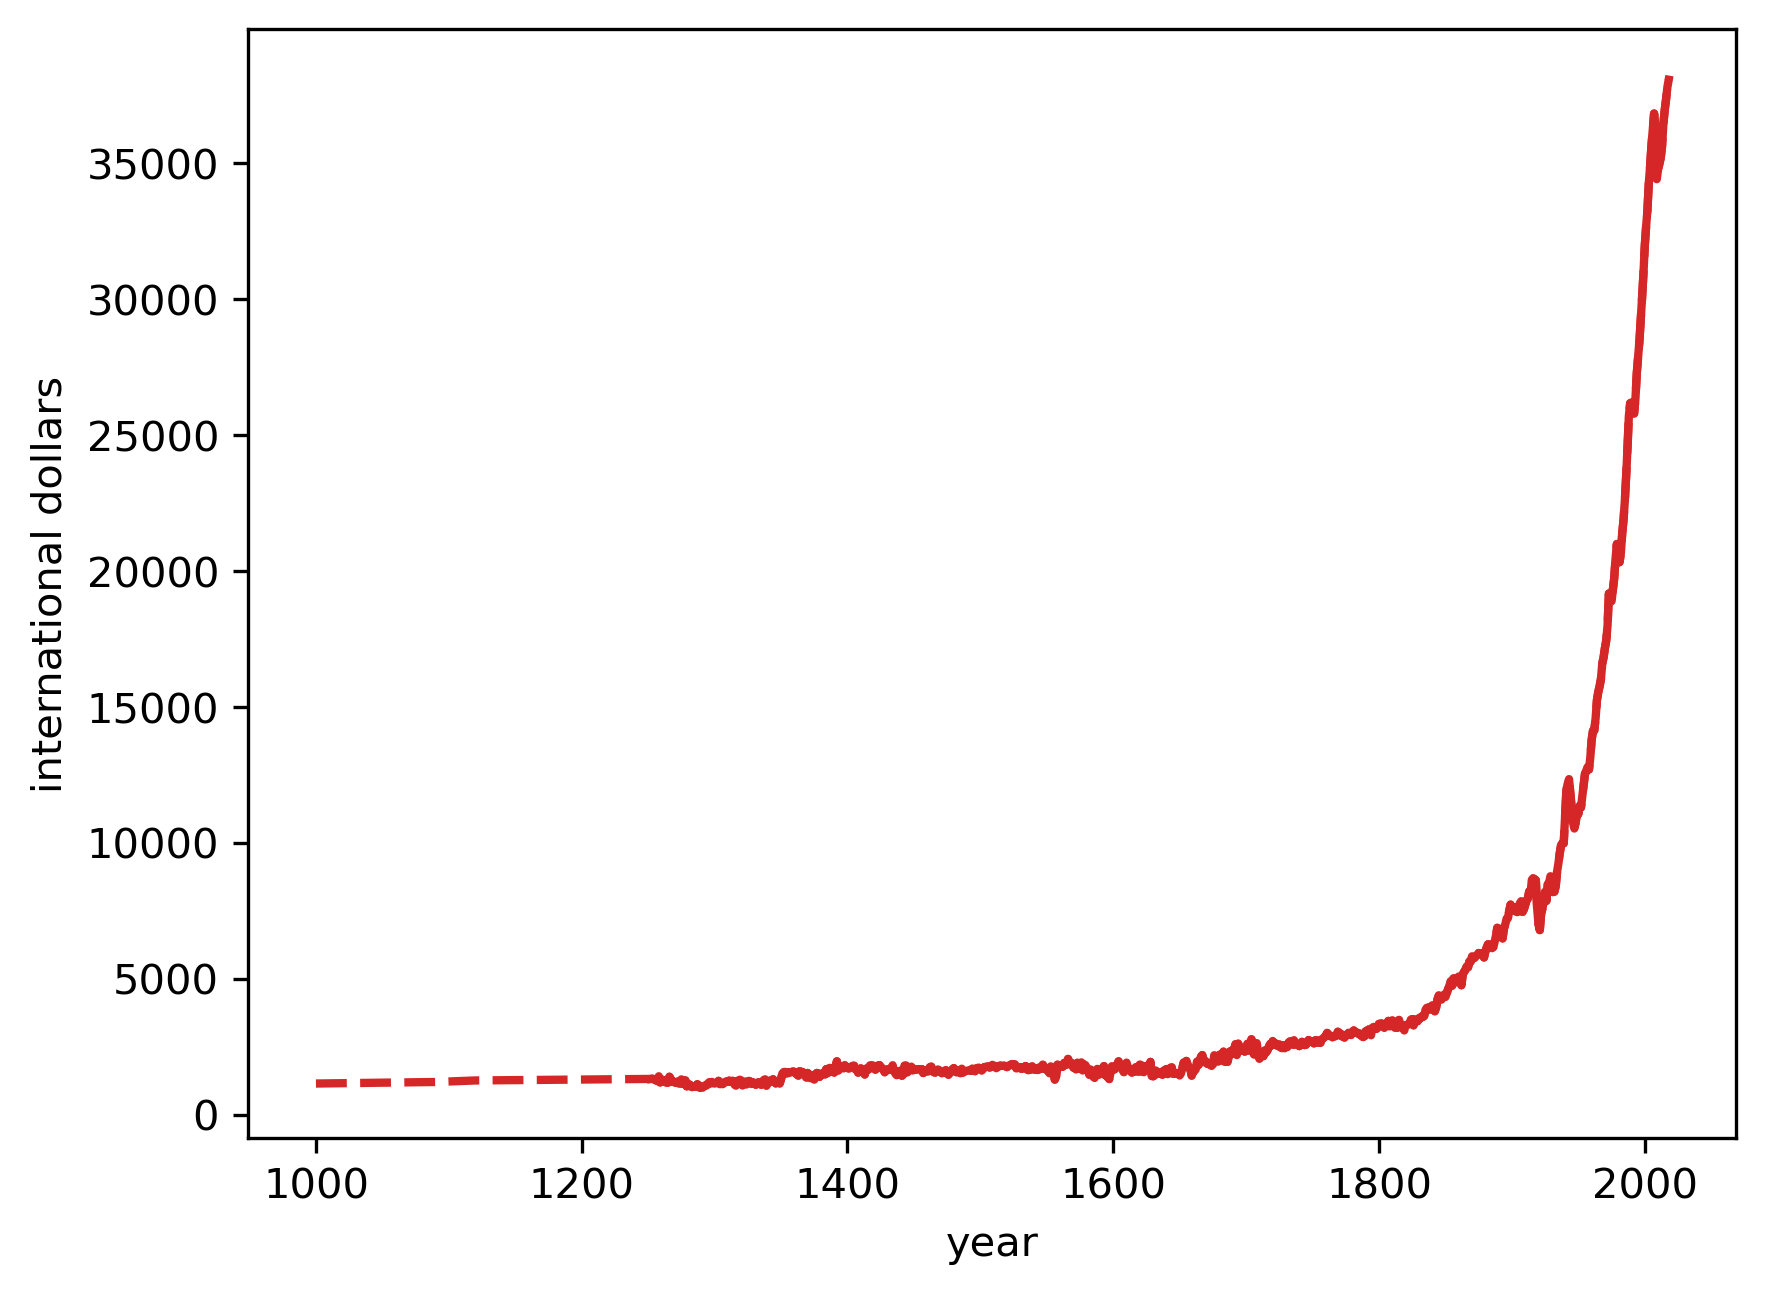

In [19]:
# Se crea una figura y un eje con una resolución especificada de 300 DPI.
fig, ax = plt.subplots(dpi=300)

# Selecciona el código de país 'GBR' para el Reino Unido.
country = 'GBR'

# Dibuja en el eje una línea del PIB per cápita para el país seleccionado.
# Usa 'interpolate()' para llenar los valores faltantes en los datos de forma lineal.
# Configura el estilo de la línea como discontinua ('--'), el grosor de la línea ('lw') en 2,
# y el color obtenido del diccionario 'color_mapping' que mapea cada país a un color específico.
ax.plot(gdp_pc[country].interpolate(),
        linestyle='--',
        lw=2,
        color=color_mapping[country])

# Dibuja otra línea en el eje con los datos originales del PIB per cápita (sin interpolación) para el mismo país.
# Configura el grosor de la línea en 2 y usa el mismo color asignado al país.
ax.plot(gdp_pc[country],
        lw=2,
        color=color_mapping[country])

# Establece el título del eje y como 'international dollars', que puede referirse a dólares internacionales o una medida estandarizada de dinero.
ax.set_ylabel('international dollars')

# Establece el título del eje x como 'year', indicando que el eje horizontal representa años.
ax.set_xlabel('year')
plt.show()

### Comparación entre EE.UU., Reino Unido y China
En esta sección compararemos el crecimiento del PIB de Estados Unidos, Reino Unido y China.

Como primer paso, crearemos una función que genere gráficos para una lista de países

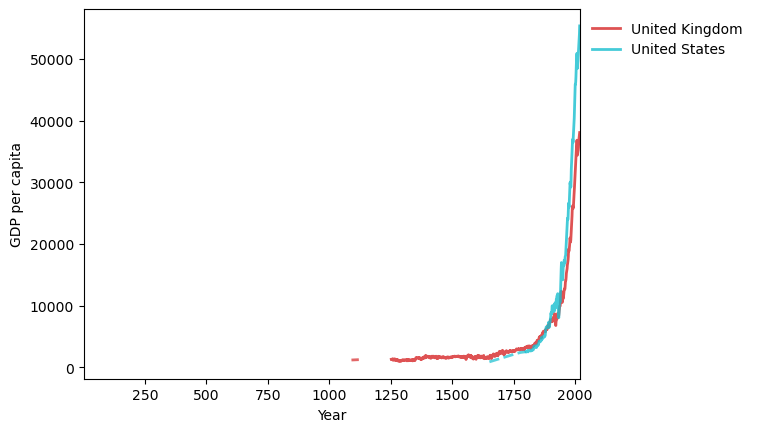

In [20]:
def draw_interp_plots(series,        # Serie de pandas con datos de tiempo
                      country,       # Lista de códigos de países para graficar
                      ylabel,        # Etiqueta para el eje y
                      xlabel,        # Etiqueta para el eje x
                      color_mapping, # Diccionario mapeando códigos de país a colores
                      code_to_name,  # Diccionario mapeando códigos de país a nombres completos
                      lw,            # Ancho de línea para los gráficos
                      logscale,      # Booleano para aplicar escala logarítmica al eje y
                      ax             # Eje de matplotlib donde dibujar los gráficos
                     ):

    for c in country:
        # Obtiene los datos interpolados solo en áreas internas, excluyendo los extremos
        df_interpolated = series[c].interpolate(limit_area='inside')
        # Extrae solo los datos que han sido interpolados
        interpolated_data = df_interpolated[series[c].isnull()]

        # Dibuja los datos interpolados con líneas discontinuas
        ax.plot(interpolated_data,
                linestyle='--',
                lw=lw,
                alpha=0.7,  # Transparencia de la línea
                color=color_mapping[c])

        # Dibuja los datos originales con líneas sólidas
        ax.plot(series[c],
                lw=lw,
                color=color_mapping[c],
                alpha=0.8,  # Transparencia de la línea
                label=code_to_name.loc[c]['country'])
        
        # Aplica escala logarítmica si 'logscale' es True
        if logscale:
            ax.set_yscale('log')
    
    # Dibuja la leyenda fuera del gráfico para evitar solapamiento con las líneas
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
    # Configura las etiquetas de los ejes
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    # Establece un límite de visibilidad para evitar que la leyenda oculte los datos
    ax.set_xlim(series.index.min(), series.index.max())

# Ejemplo de uso:
fig, ax = plt.subplots()
draw_interp_plots(gdp_pc, ['GBR', 'USA'], 'GDP per capita', 'Year', color_mapping, code_to_name, 2, False, ax)
plt.show()


Como puede verse en este gráfico, el crecimiento económico comenzó en serio en el siglo XVIII y continuó durante los doscientos años siguientes.

¿Qué diferencia hay con las trayectorias de crecimiento de otros países?

Veamos los casos de Estados Unidos (USA), Reino Unido (GBR) y China (CHN)

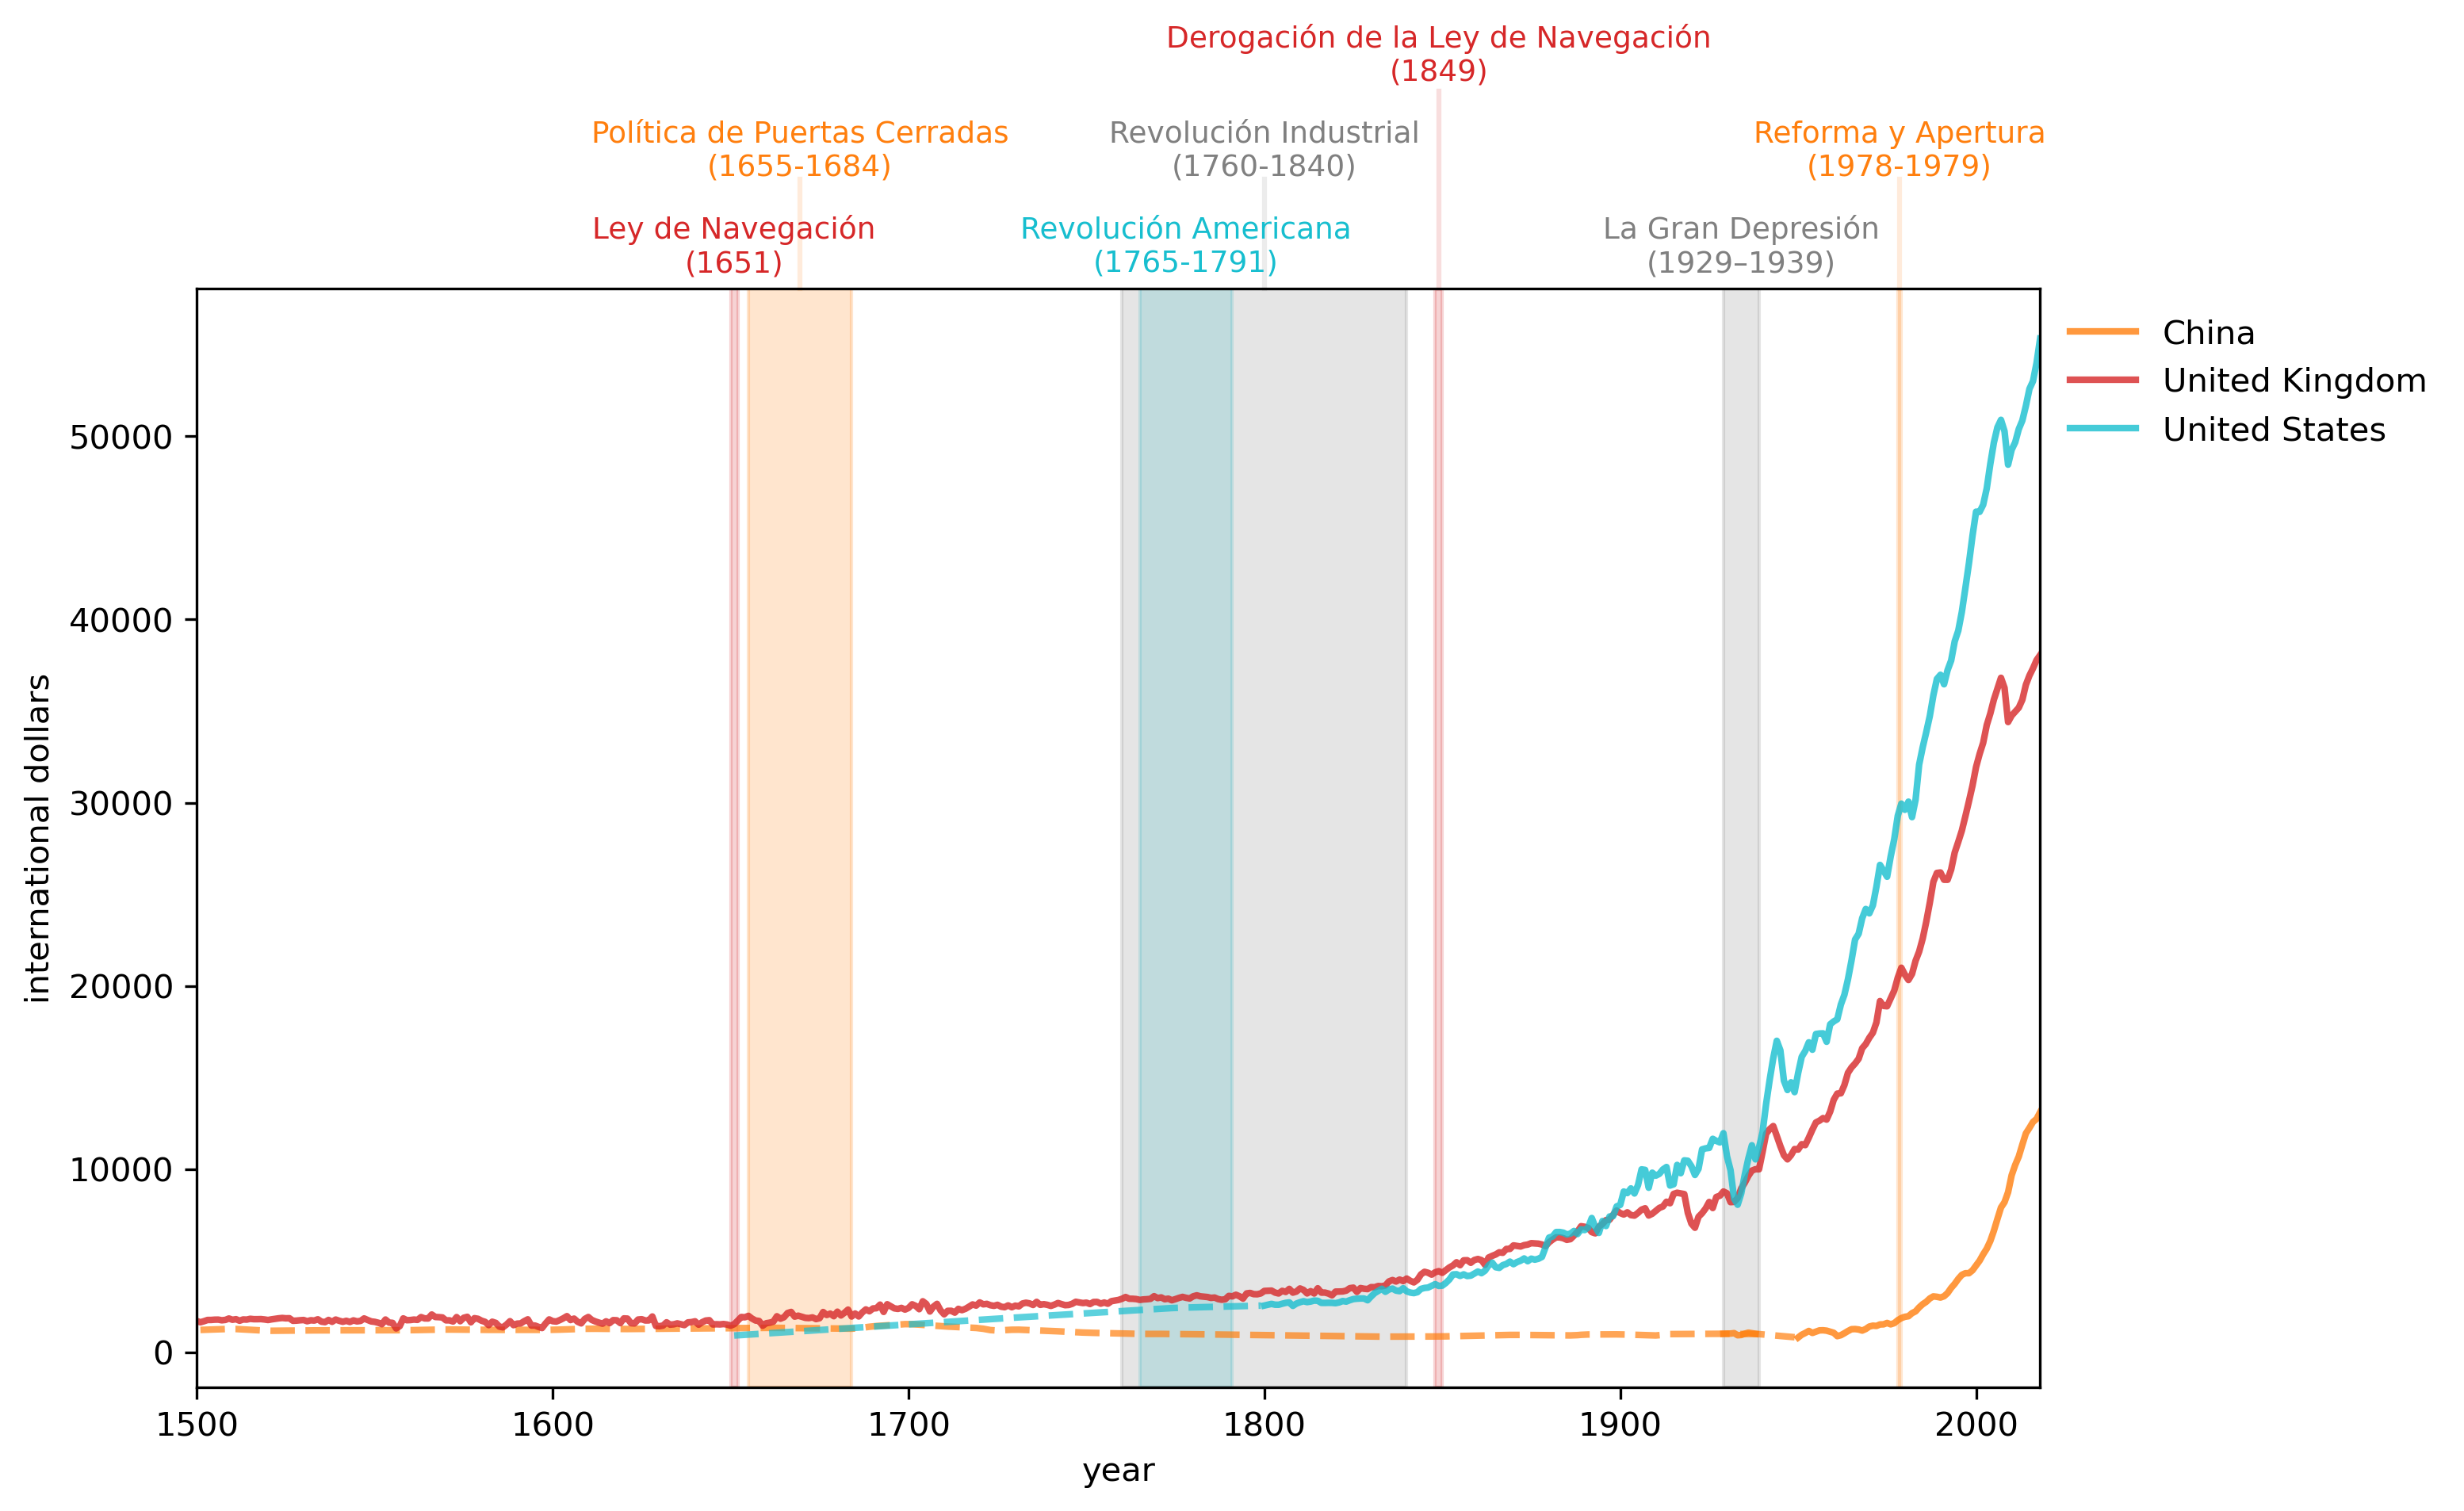

In [25]:
from collections import namedtuple
import matplotlib.pyplot as plt

# Define una namedtuple 'Event' para estructurar mejor la información de los eventos
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

# Crea una figura y un eje con alta resolución y tamaño específico
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

# Lista de códigos de países a graficar
country = ['CHN', 'GBR', 'USA']
# Llama a la función definida anteriormente para dibujar gráficos interpolados
draw_interp_plots(gdp_pc[country].loc[1500:], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

# Obtiene el límite superior del eje y para usar en la colocación de texto
ylim = ax.get_ylim()[1]
# Parámetros base para el diseño de las barras de eventos
b_params = {'color': 'grey', 'alpha': 0.2}
# Parámetros base para el diseño del texto de eventos
t_params = {'fontsize': 9, 
            'va': 'center', 'ha': 'center'}

# Lista de eventos importantes para anotar en el gráfico
events = [
    Event((1650, 1652), ylim + ylim*0.04,
          'Ley de Navegación\n(1651)',
          color_mapping['GBR'], 1),
    Event((1655, 1684), ylim + ylim*0.13,
          'Política de Puertas Cerradas\n(1655-1684)',
          color_mapping['CHN'], 1.1),
    Event((1848, 1850), ylim + ylim*0.22,
          'Derogación de la Ley de Navegación\n(1849)',
          color_mapping['GBR'], 1.18),
    Event((1765, 1791), ylim + ylim*0.04,
          'Revolución Americana\n(1765-1791)',
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.13,
          'Revolución Industrial\n(1760-1840)',
          'grey', 1.1),
    Event((1929, 1939), ylim + ylim*0.04,
          'La Gran Depresión\n(1929–1939)',
          'grey', 1),
    Event((1978, 1979), ylim + ylim*0.13,
          'Reforma y Apertura\n(1978-1979)',
          color_mapping['CHN'], 1.1)
]



def draw_events(events, ax):
    # Itera sobre cada evento, añadiendo anotaciones y líneas verticales
    for event in events:
        event_mid = sum(event.year_range) / 2  # Calcula el punto medio del rango del año del evento
        # Añade texto en el punto medio del evento
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        # Dibuja una barra vertical que abarca el rango del año del evento
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        # Dibuja una línea vertical en el punto medio para mayor énfasis
        ax.axvline(event_mid, ymin=1, ymax=event.ymax, color=event.color,
                   clip_on=False, alpha=0.15)

# Dibuja los eventos en el gráfico
draw_events(events, ax)
plt.show()


El gráfico anterior del PIB per cápita revela de forma sorprendente cómo la expansión de la Revolución Industrial ha elevado gradualmente el nivel de vida de grupos importantes de personas.

* la mayor parte del crecimiento se produjo en los 150 años posteriores a la Revolución Industrial.

* El PIB per cápita de EE.UU. y el Reino Unido aumentó y divergió del de China entre 1820 y 1940.

* la diferencia se ha reducido rápidamente después de 1950 y, sobre todo, a partir de finales de la década de 1970.

* Estos resultados reflejan complicadas combinaciones de factores tecnológicos y de política económica que los estudiosos del crecimiento económico intentan comprender y cuantificar.

### Centrándonos en China
Resulta fascinante observar los niveles de PIB per cápita de China desde 1500 hasta la década de 1970.

Obsérvese el largo periodo de descenso de los niveles de PIB per cápita desde 1700 hasta principios del siglo XX.

Así, el gráfico indica

* una larga recesión económica y estancamiento tras la Política de Puertas Cerradas del gobierno Qing.

* La experiencia de China fue muy diferente a la del Reino Unido tras el inicio de la revolución industrial en este país.

* Cómo el Movimiento de Autofortalecimiento pareció ayudar sobre todo a China a crecer.

* lo asombrosos que han sido los logros de crecimiento de las modernas políticas económicas chinas de la RPC que culminaron con su reforma y liberalización de finales de los años setenta.

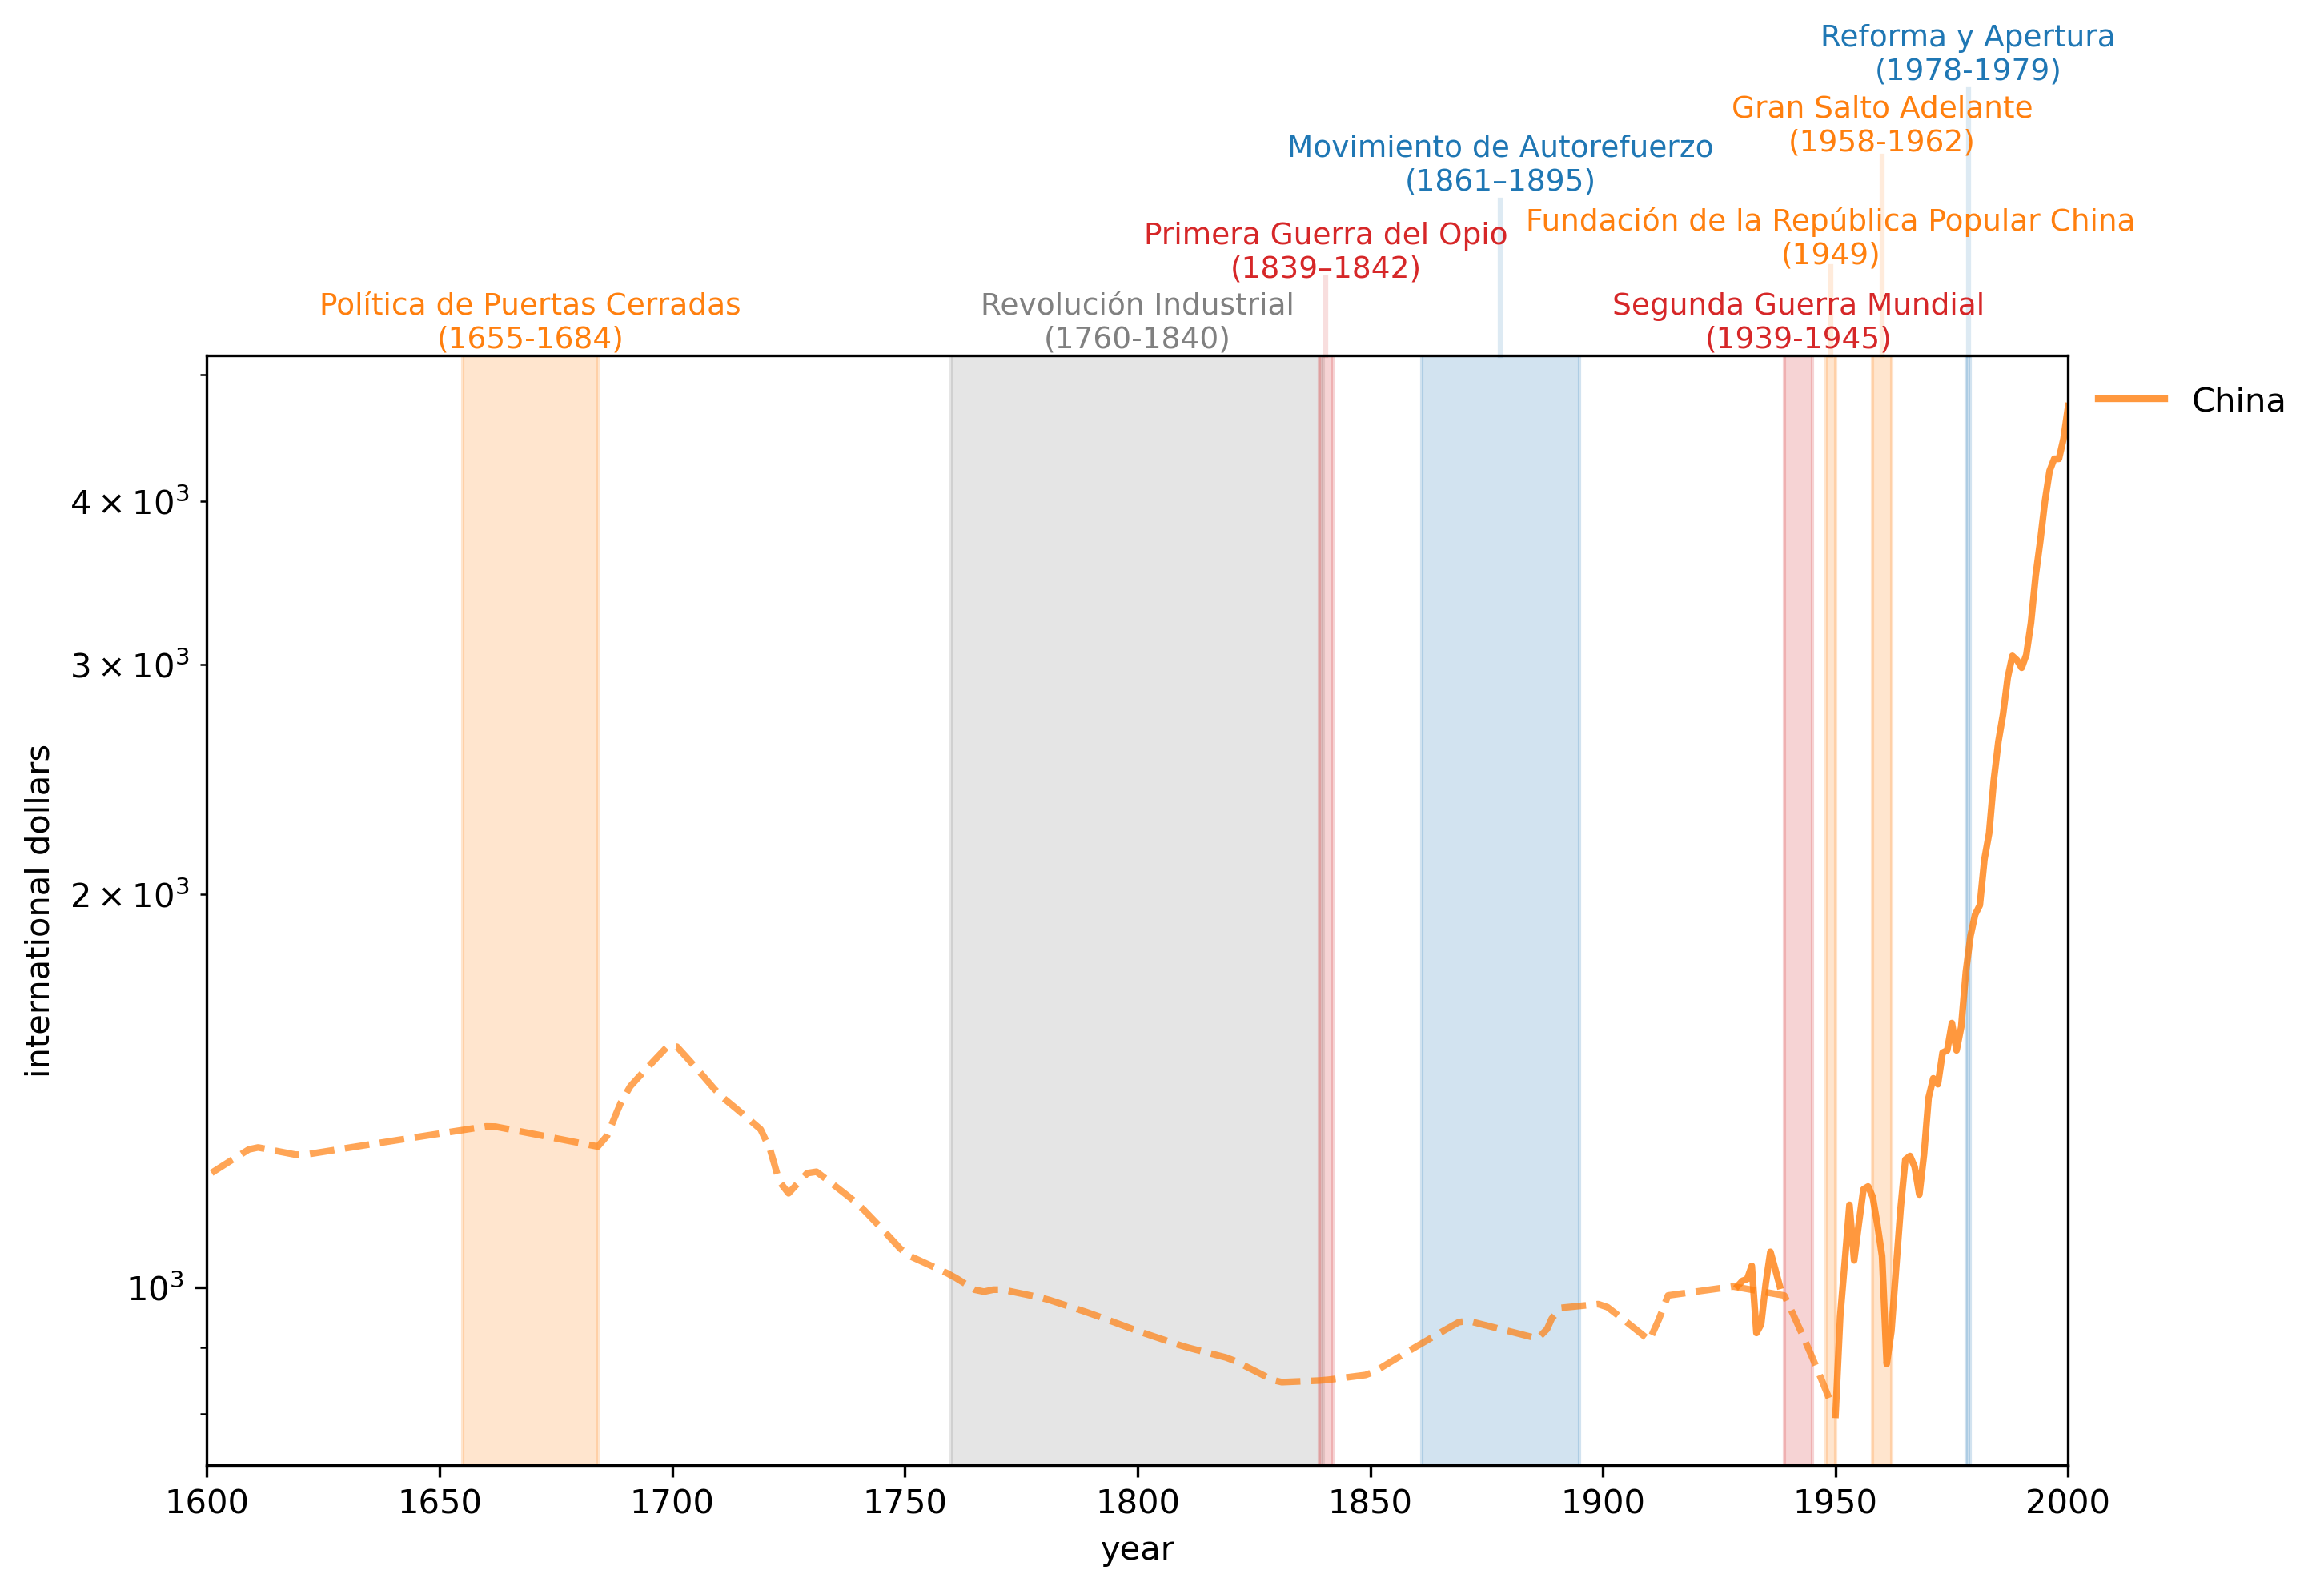

In [26]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['CHN']
draw_interp_plots(gdp_pc[country].loc[1600:2000], 
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

events = [
    Event((1655, 1684), ylim + ylim*0.06,
          'Política de Puertas Cerradas\n(1655-1684)',
          'tab:orange', 1),
    Event((1760, 1840), ylim + ylim*0.06,
          'Revolución Industrial\n(1760-1840)',
          'grey', 1),
    Event((1839, 1842), ylim + ylim*0.2,
          'Primera Guerra del Opio\n(1839–1842)',
          'tab:red', 1.07),
    Event((1861, 1895), ylim + ylim*0.4,
          'Movimiento de Autorefuerzo\n(1861–1895)',
          'tab:blue', 1.14),
    Event((1939, 1945), ylim + ylim*0.06,
          'Segunda Guerra Mundial\n(1939-1945)',
          'tab:red', 1),
    Event((1948, 1950), ylim + ylim*0.23,
          'Fundación de la República Popular China\n(1949)',
          color_mapping['CHN'], 1.08),
    Event((1958, 1962), ylim + ylim*0.5,
          'Gran Salto Adelante\n(1958-1962)',
          'tab:orange', 1.18),
    Event((1978, 1979), ylim + ylim*0.7,
          'Reforma y Apertura\n(1978-1979)',
          'tab:blue', 1.24)
]

# Draw events
draw_events(events, ax)
plt.show()

### Estados Unidos y Reino Unido
A continuación examinaremos con más detalle los casos de Estados Unidos (EE.UU.) y el Reino Unido (GBR).

En el siguiente gráfico, observe

* impacto de la política comercial (Ley de Navegación).

* cambios en la productividad provocados por la Revolución Industrial.

* cómo EE.UU. se acerca gradualmente y luego supera al Reino Unido, sentando las bases del ''Siglo Americano''.

* las consecuencias, a menudo imprevistas, de las guerras.

* las interrupciones y cicatrices dejadas por las recesiones y depresiones del ciclo económico.

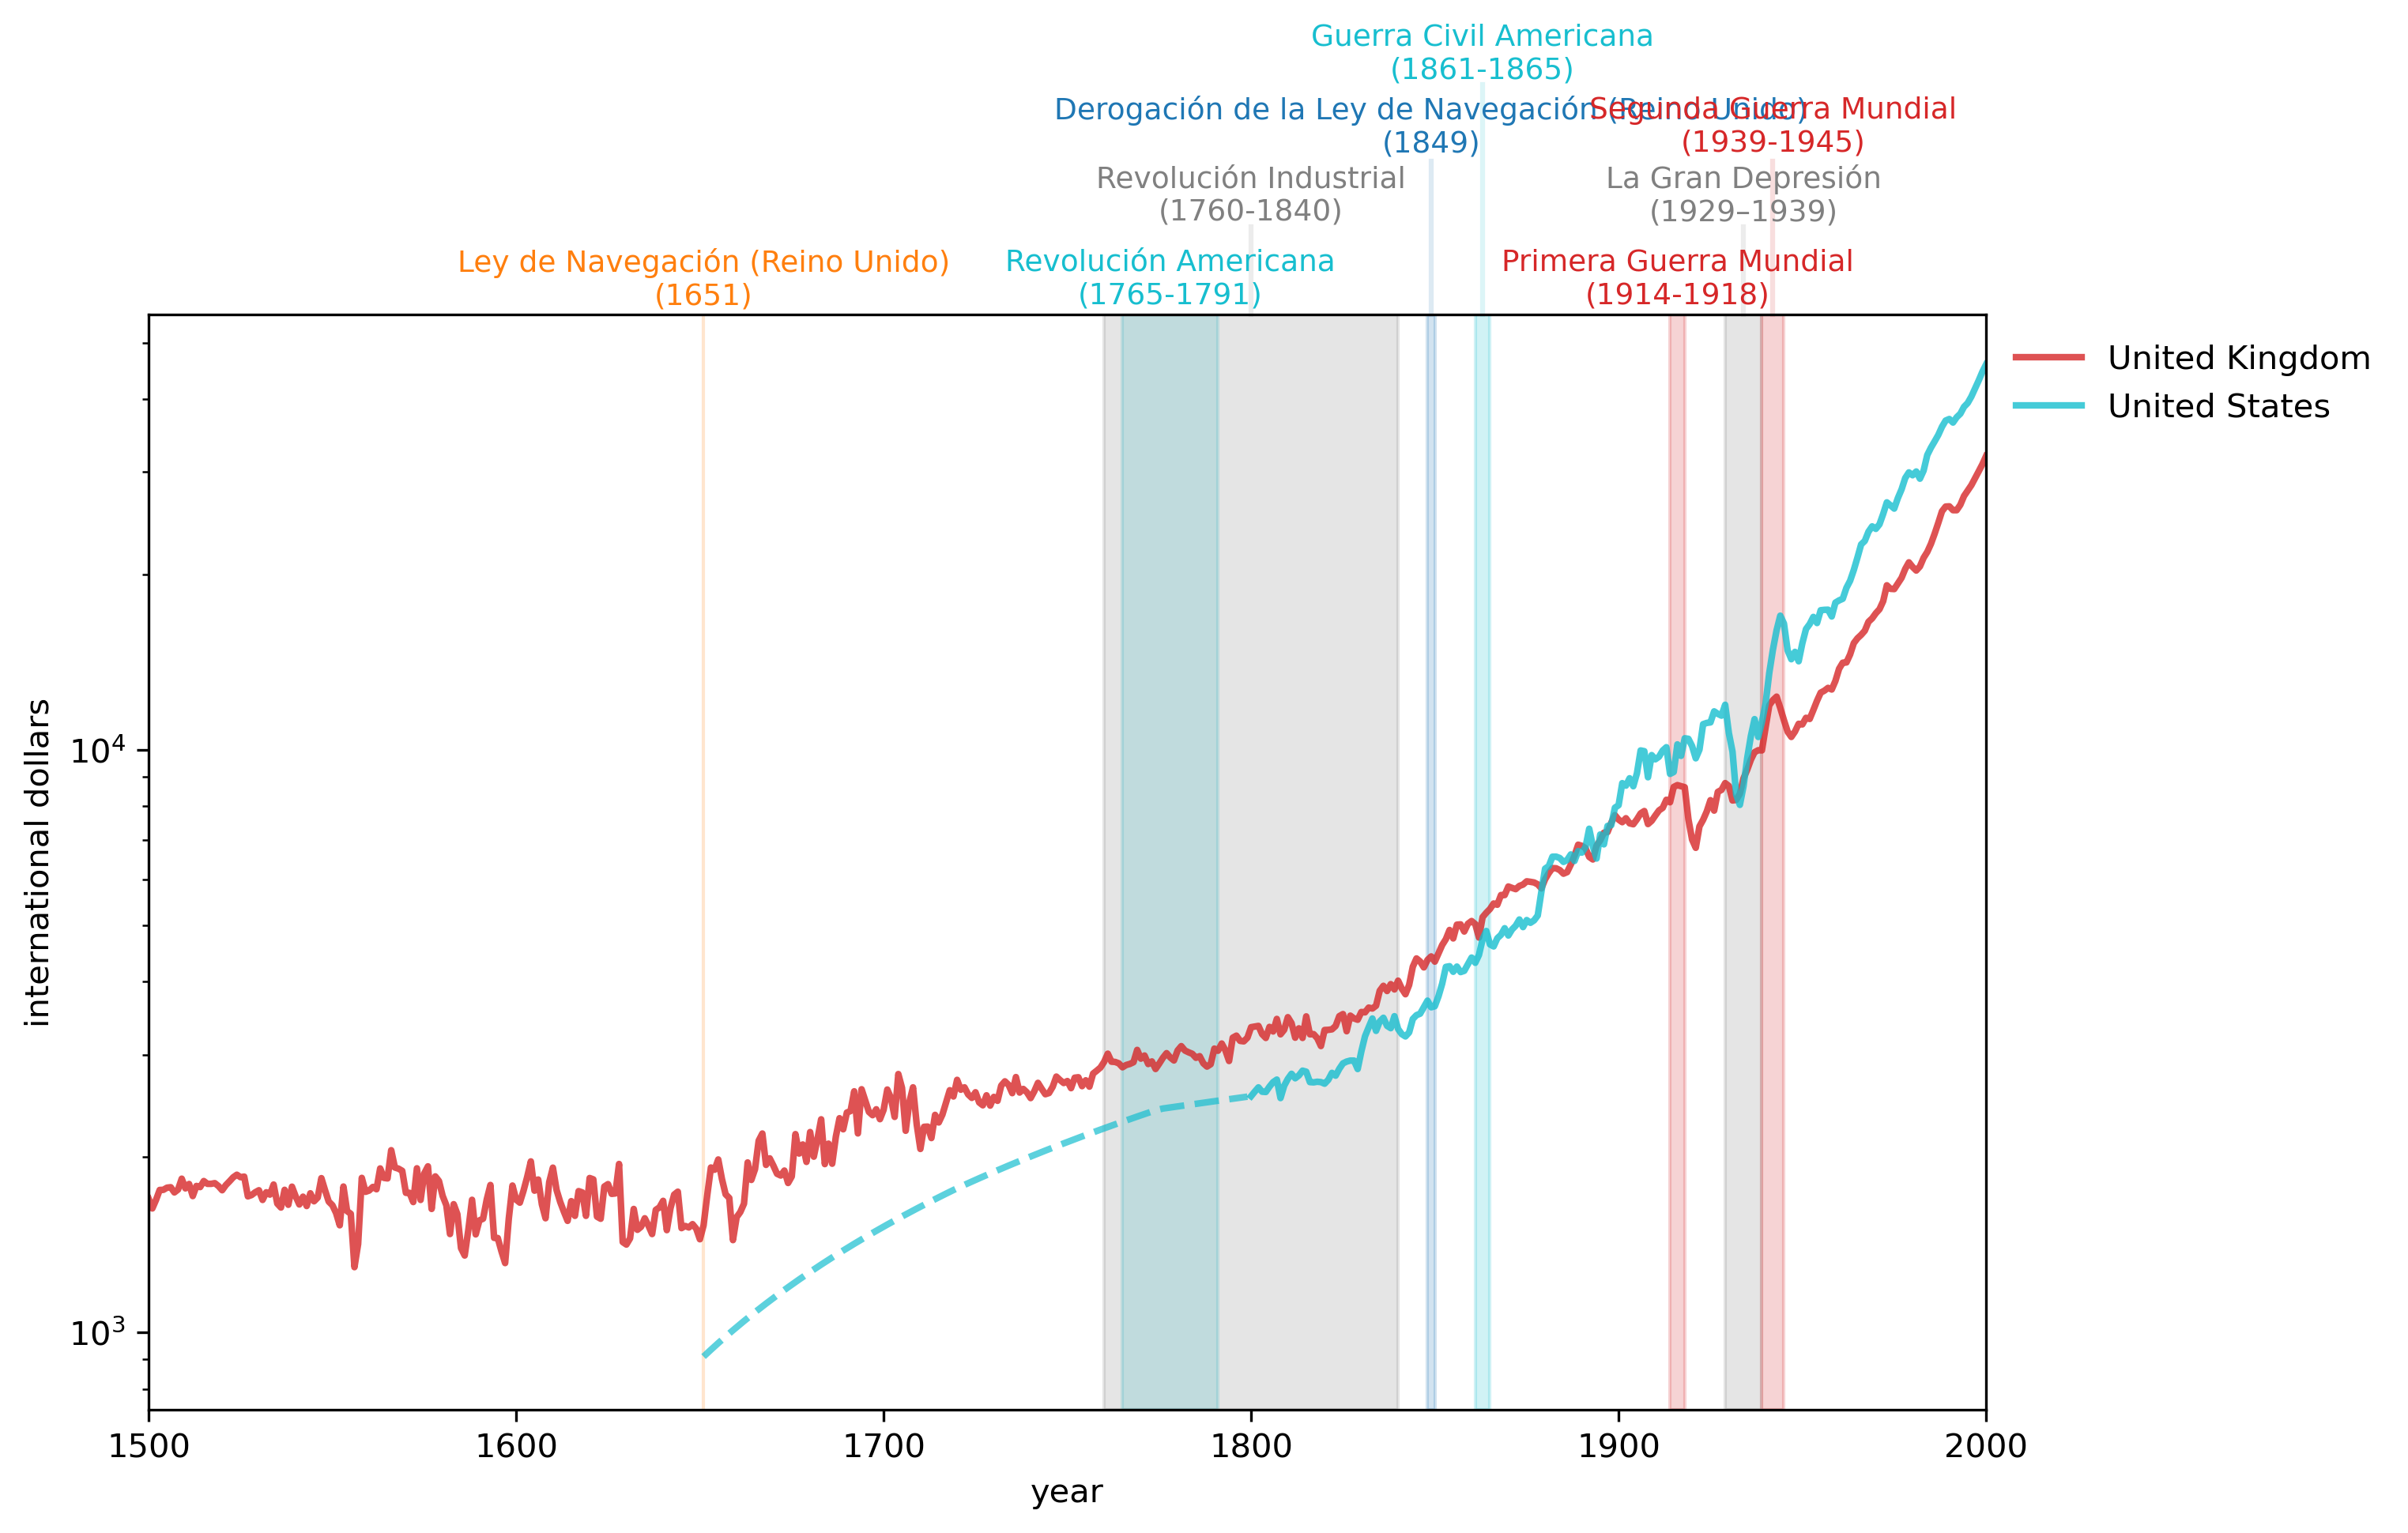

In [27]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['GBR', 'USA']
draw_interp_plots(gdp_pc[country].loc[1500:2000],
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, True, ax)

ylim = ax.get_ylim()[1]

# Create a list of data points
events = [
    Event((1651, 1651), ylim + ylim*0.15,
          'Ley de Navegación (Reino Unido)\n(1651)',
          'tab:orange', 1),
    Event((1765, 1791), ylim + ylim*0.15,
          'Revolución Americana\n(1765-1791)',
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.6,
          'Revolución Industrial\n(1760-1840)',
          'grey', 1.08),
    Event((1848, 1850), ylim + ylim*1.1,
          'Derogación de la Ley de Navegación (Reino Unido)\n(1849)',
          'tab:blue', 1.14),
    Event((1861, 1865), ylim + ylim*1.8,
          'Guerra Civil Americana\n(1861-1865)',
          color_mapping['USA'], 1.21),
    Event((1914, 1918), ylim + ylim*0.15,
          'Primera Guerra Mundial\n(1914-1918)',
          'tab:red', 1),
    Event((1929, 1939), ylim + ylim*0.6,
          'La Gran Depresión\n(1929–1939)',
          'grey', 1.08),
    Event((1939, 1945), ylim + ylim*1.1,
          'Segunda Guerra Mundial\n(1939-1945)',
          'tab:red', 1.14)
]


# Draw events
draw_events(events, ax)
plt.show()

In [29]:
%store draw_interp_plots

Proper storage of interactively declared classes (or instances
of those classes) is not possible! Only instances
of classes in real modules on file system can be %store'd.

